In [1]:
# Step1: Importing libraries of python

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step2: Load the training and testing dataset

train_data = pd.read_csv("/content/training_data.csv")
test_data = pd.read_csv("/content/testing_data.csv")

In [3]:
# Step3: Exploratory Data Analysis (EDA)

# Training dataset

print("Training Data:")
print(train_data.head())
print(train_data.info())
print(train_data.describe())

Training Data:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            May-21          10.16  
1       Powder            Oct-20         134.28  
2       Powder            Dec-20          12.46  
3       Powder            Feb-21         107.22  
4       Liquid            Nov-20         197.76  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Ma

In [4]:
# Testing dataset

print("\nTest Data:")
print(test_data.head())
print(test_data.info())
print(test_data.describe())


Test Data:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1           X1       A10             ECOM        Large   
3        NTM1           X1       A11           DIRECT        Large   
4        NTM1           X1        A2           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            Jun-21         103.68  
1       Powder            Jun-21         155.75  
2       Powder            Jun-21         143.02  
3       Powder            Jun-21         139.39  
4       Powder            Jun-21         169.42  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer    

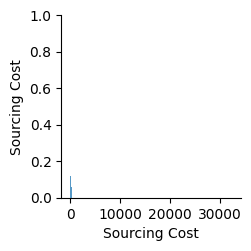

In [5]:
#Visualizations

# Pairplot
sns.pairplot(train_data)
plt.show()


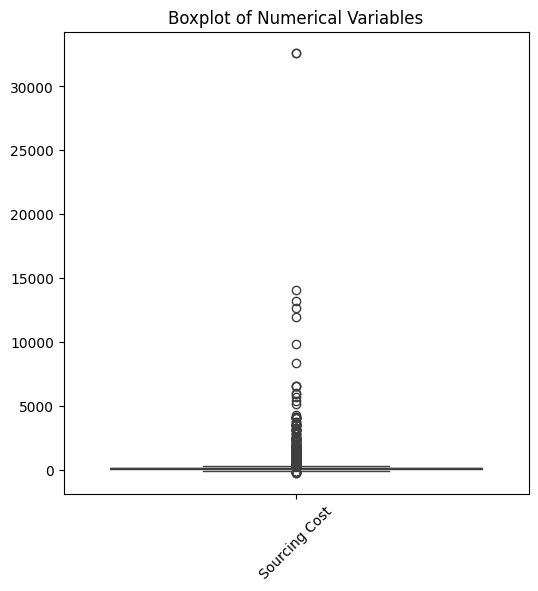

In [6]:
# Boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=train_data)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

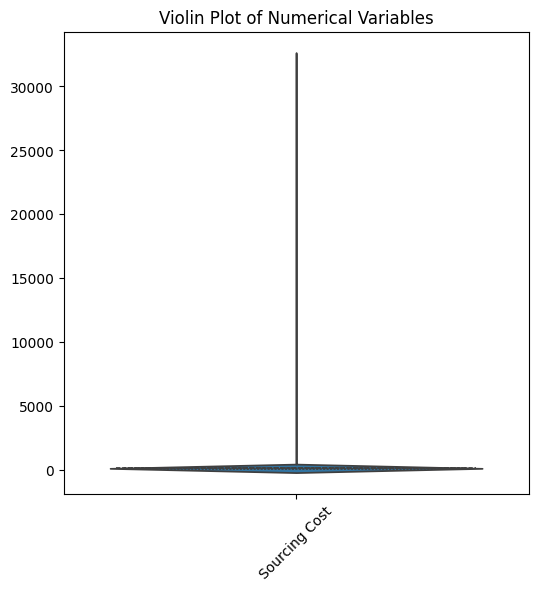

In [7]:
# Violin plot
plt.figure(figsize=(6, 6))
sns.violinplot(data=train_data, inner='quartile')
plt.title('Violin Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

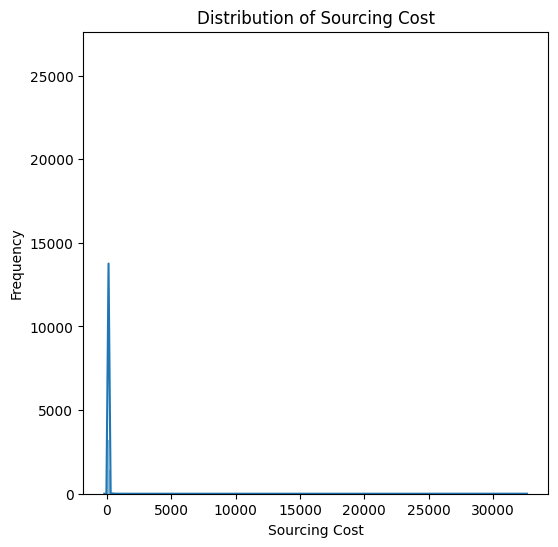

In [8]:
# Distribution plot
plt.figure(figsize=(6, 6))
sns.histplot(train_data['Sourcing Cost'], kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Summary statistics
train_summary = train_data.describe()
print(train_summary)

       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000


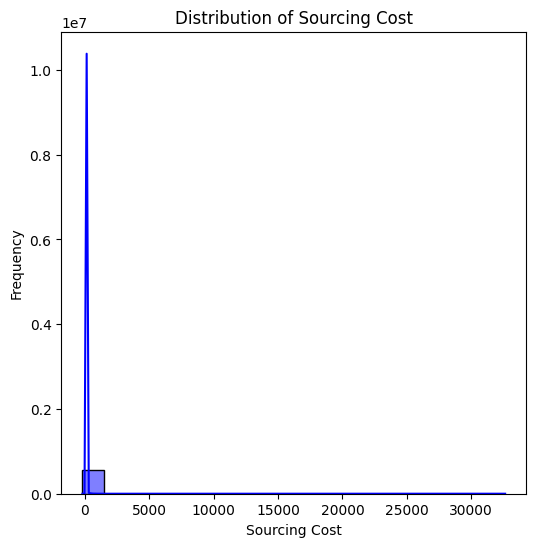

In [10]:
# Distribution of target variable
plt.figure(figsize=(6, 6))
sns.histplot(train_data['Sourcing Cost'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

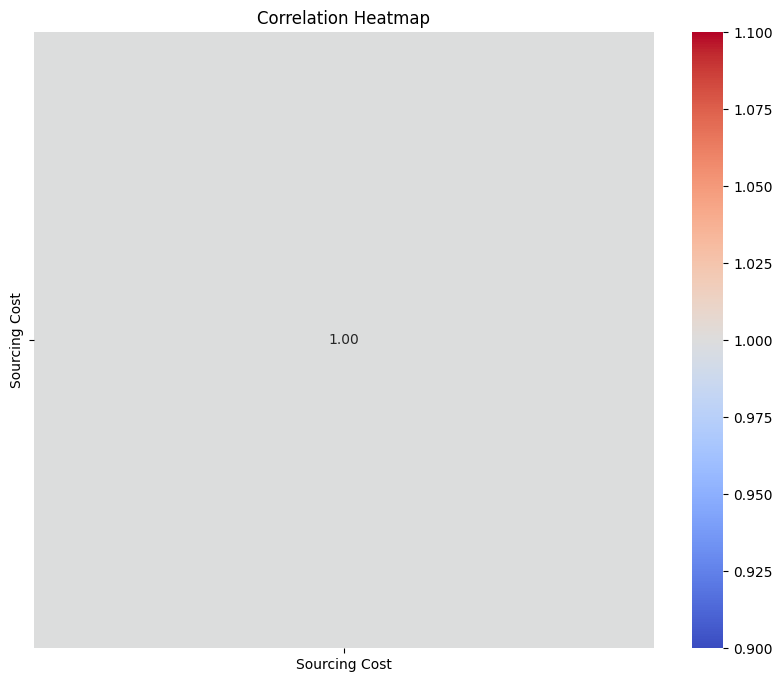

In [11]:
# Correlation heatmap
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#Step4: Data preprocessing

#Missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

# Splitting the data
X_train = train_data.drop("Sourcing Cost", axis=1)
y_train = train_data["Sourcing Cost"]
X_test = test_data.drop("Sourcing Cost", axis=1)
y_test = test_data["Sourcing Cost"]

# Ensure that all one-hot encoded features present in training data are also in test data
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Reorder the features in test data to match the order in training data
X_test = X_test[X_train.columns]

In [13]:
#Step5: Model Selection

#Model1: Gradiant Booster and XGB Regressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Initialize XGBoost Regressor with chosen hyperparameters
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = mse ** 0.5

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1250.33371403672
Root Mean Squared Error (RMSE): 35.3600581735483


In [14]:
#Model2: Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate Mean Squared Error for Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)

# Calculate Root Mean Squared Error for linear regression model
rmse_linear = mse_linear ** 0.5
print("Root Mean Squared Error (Linear Regression):", rmse_linear)

Mean Squared Error (Linear Regression): 1700.9116947089003
Root Mean Squared Error (Linear Regression): 41.242110696579296


In [15]:
# Model3: Random Forest model

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error for Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

# Calculate Root Mean Squared Error for Random Forest model
rmse_rf = mse_rf ** 0.5
print("Root Mean Squared Error (Random Forest):", rmse_rf)

print("Feature Importance : ",rf_model.feature_importances_)

Mean Squared Error (Random Forest): 1917.3671163388672
Root Mean Squared Error (Random Forest): 43.78775075679118
Feature Importance :  [1.62402210e-02 1.82237506e-01 1.22830917e-01 7.80992410e-05
 2.74201146e-03 2.29953538e-03 3.04042038e-04 4.01933444e-04
 3.92537429e-03 3.05031769e-04 3.87294633e-03 4.11085540e-03
 2.29686806e-02 2.67391837e-03 2.51059001e-03 3.40723814e-04
 1.00171655e-02 9.12259051e-05 1.12767192e-02 7.54586516e-03
 1.65204013e-02 1.02693486e-02 3.34317028e-02 1.72940726e-02
 5.36883069e-03 5.86880095e-06 1.39529844e-04 5.75846943e-03
 2.93493001e-04 1.04650531e-04 1.64085031e-02 5.58552433e-03
 2.57062118e-03 8.75841993e-03 1.36626540e-05 1.25807863e-05
 9.85967852e-05 8.05118271e-06 6.99601522e-02 6.39814101e-02
 2.27823138e-03 1.90124074e-03 1.28802724e-03 6.67158730e-05
 9.51741510e-05 1.85053857e-04 1.47285423e-02 4.52567420e-05
 5.96742380e-03 4.67919599e-03 4.84778394e-05 1.17280170e-02
 2.96004081e-02 7.23719880e-03 3.76971975e-03 1.66226898e-02
 1.2025939

In [16]:
#Model4: Decision Tree

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate Mean Squared Error for Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)

# Calculate Root Mean Squared Error for Random Forest model
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print("Root Mean Squared Error (Decision Tree):", rmse_dt)

print("Feature Importance is: ",dt_model.feature_importances_)

Mean Squared Error (Decision Tree): 1937.007763321854
Root Mean Squared Error (Decision Tree): 44.01145036603377
Feature Importance is:  [1.68405347e-02 1.85872240e-01 1.25566154e-01 2.53575431e-04
 2.59012616e-04 2.24942749e-03 3.06942913e-04 4.15004162e-04
 4.00267628e-03 2.64518336e-04 3.95713583e-03 4.23622854e-03
 2.34525655e-02 2.72372648e-03 2.57921731e-03 7.84639196e-04
 1.02293173e-02 0.00000000e+00 3.91886281e-03 7.28236006e-03
 1.53014066e-02 1.05808330e-02 3.46854558e-02 1.76781333e-02
 5.48266994e-03 0.00000000e+00 1.31911094e-04 4.94792232e-04
 3.01626794e-04 1.07389427e-04 1.81324046e-02 5.73243327e-03
 2.01241656e-03 8.54038005e-03 1.08593756e-05 3.15609932e-06
 8.10983729e-05 3.09264413e-07 7.16207285e-02 6.54299940e-02
 2.14413689e-03 1.95203657e-03 1.31950117e-03 8.19042376e-05
 9.81056515e-05 8.89117632e-05 1.50617263e-02 4.87080293e-05
 8.72003549e-03 5.51589905e-03 2.10033056e-05 2.37598669e-02
 1.90786676e-02 1.76758040e-03 3.85434637e-03 1.58812056e-02
 1.263562

In [17]:
# Step:6 Print MSE and RMSE for each model
print("Mean Squared Error (Random Forest):", mse_rf)
print("Root Mean Squared Error (Random Forest):", rmse_rf)

print("Mean Squared Error (Gradient Boosting):", mse)
print("Root Mean Squared Error (Gradient Boosting):", rmse)

print("Mean Squared Error (XGBoost):", mse)
print("Root Mean Squared Error (XGBoost):", rmse)

print("Mean Squared Error (Linear Regression):", mse_linear)
print("Root Mean Squared Error (Linear Regression):", rmse_linear)

print("Mean Squared Error (Decision Tree):", mse_dt)
print("Root Mean Squared Error (Decision Tree):", rmse_dt)

Mean Squared Error (Random Forest): 1917.3671163388672
Root Mean Squared Error (Random Forest): 43.78775075679118
Mean Squared Error (Gradient Boosting): 1250.33371403672
Root Mean Squared Error (Gradient Boosting): 35.3600581735483
Mean Squared Error (XGBoost): 1250.33371403672
Root Mean Squared Error (XGBoost): 35.3600581735483
Mean Squared Error (Linear Regression): 1700.9116947089003
Root Mean Squared Error (Linear Regression): 41.242110696579296
Mean Squared Error (Decision Tree): 1937.007763321854
Root Mean Squared Error (Decision Tree): 44.01145036603377


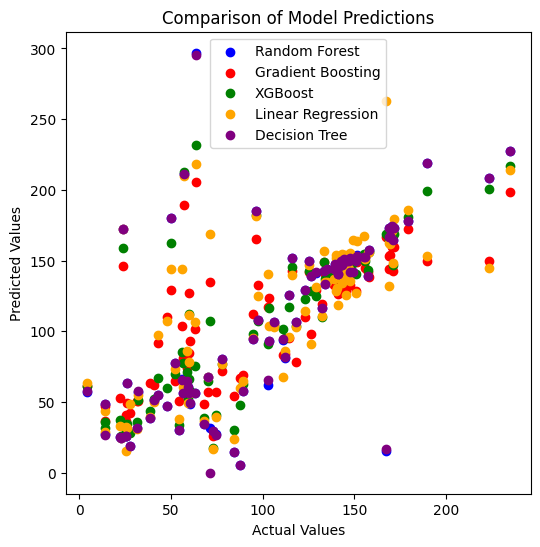

In [18]:
# Step7: Compare models
# Plot predicted vs actual values
plt.figure(figsize=(6, 6))

# Plotting Random Forest
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest')

# Plotting Gradient Boosting
plt.scatter(y_test, y_pred, color='red', label='Gradient Boosting')

# Plotting XGBoost
plt.scatter(y_test, y_pred_xgb, color='green', label='XGBoost')

# Plotting Linear Regression
plt.scatter(y_test, y_pred_linear, color='orange', label='Linear Regression')

# Plotting Decision Tree
plt.scatter(y_test, y_pred_dt, color='purple', label='Decision Tree')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()

In [20]:
# Step8: Determine the best model based on MSE and RMSE
best_model = None
min_mse = float('inf')
min_rmse = float('inf')

# Check Random Forest
if mse_rf < min_mse:
    min_mse = mse_rf
    min_rmse = rmse_rf
    best_model = "Random Forest"

# Check XGBoost
if mse < min_mse:
    min_mse = mse
    min_rmse = rmse
    best_model = "XGBoost"

# Check Linear Regression
if mse_linear < min_mse:
    min_mse = mse_linear
    min_rmse = rmse_linear
    best_model = "Linear Regression"

# Check Decision Tree
if mse_dt < min_mse:
    mine_mse = mse_dt
    min_rmse = rmse_dt
    best_model = "Decision Tree"

print("Best Model based on MSE and RMSE:", best_model)
print("Minimum Mean Squared Error:", min_mse)
print("Corresponding Root Mean Squared Error:", min_rmse)

Best Model based on MSE and RMSE: XGBoost
Minimum Mean Squared Error: 1250.33371403672
Corresponding Root Mean Squared Error: 35.3600581735483


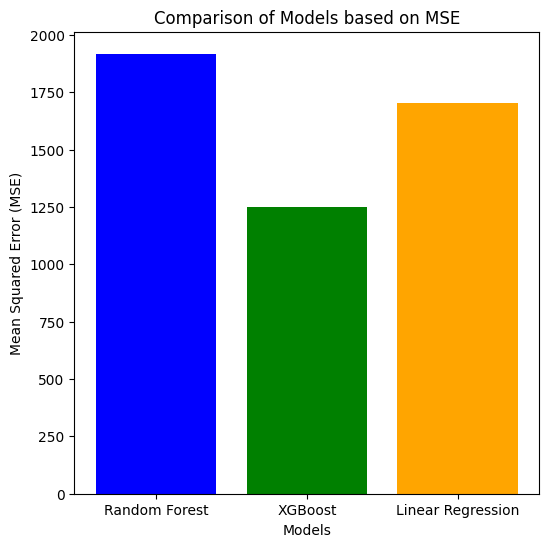

In [23]:
# Step9: Comparision of model based on MSE

import matplotlib.pyplot as plt

# Define models and their MSE values
models = ["Random Forest","XGBoost", "Linear Regression"]
mse_values = [mse_rf, mse, mse_linear]

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(models, mse_values, color=['blue','green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Models based on MSE')
plt.show()

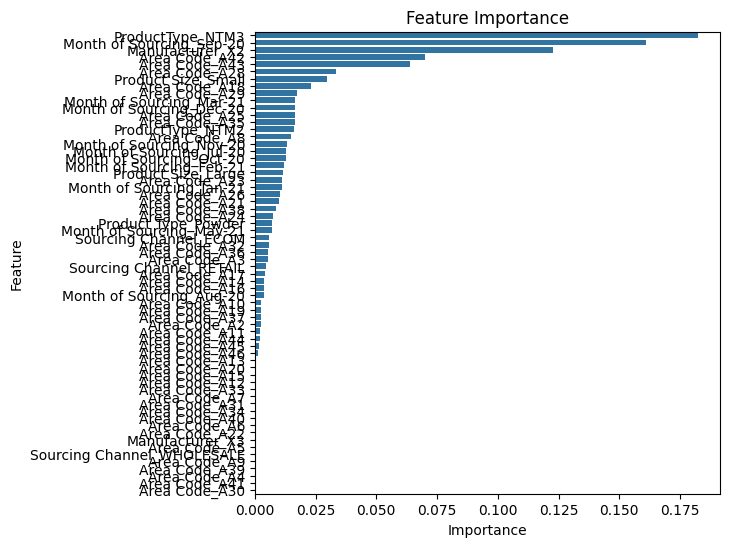

In [24]:
# Step10: Feature importance

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [25]:
# Step11: Stacked model

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


X_train_base, X_meta_train, y_train_base, y_meta_train = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
linear_model = LinearRegression()

rf_model.fit(X_train_base, y_train_base)
gb_model.fit(X_train_base, y_train_base)
linear_model.fit(X_train_base, y_train_base)

rf_predictions = rf_model.predict(X_meta_train)
gb_predictions = gb_model.predict(X_meta_train)
linear_predictions = linear_model.predict(X_meta_train)

stacked_predictions = np.column_stack((rf_predictions, gb_predictions, linear_predictions))

meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_meta_train)


rf_predictions_test = rf_model.predict(X_test)
gb_predictions_test = gb_model.predict(X_test)
linear_predictions_test = linear_model.predict(X_test)

stacked_predictions_test = np.column_stack((rf_predictions_test, gb_predictions_test, linear_predictions_test))
final_predictions = meta_model.predict(stacked_predictions_test)

# Evaluate the final stacked model
mse_stacked = mean_squared_error(y_test, final_predictions)
print("Mean Squared Error (Stacked Model):", mse_stacked)

Mean Squared Error (Stacked Model): 1590.2982024489086


In [26]:
# Step 12: Forecasting June 2021 (Assuming June 2021 data is in test_data)
if 'Month of Sourcing' in test_data.columns:
    # Extract relevant features and preprocess them
    test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'])
    test_data['Month'] = test_data['Month of Sourcing'].dt.month
    test_data['Year'] = test_data['Month of Sourcing'].dt.year

    # Predict June 2021 values using each model
    X_june_21 = test_data.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
    y_june_21_pred_rf = rf_model.predict(X_june_21)
    y_june_21_pred_xgb = xgb_model.predict(X_june_21)
    y_june_21_pred_linear = linear_model.predict(X_june_21)
else:
    print("No 'Month of Sourcing' column found in the test dataset. Unable to forecast June 2021 values.")

No 'Month of Sourcing' column found in the test dataset. Unable to forecast June 2021 values.


Q) Different approaches which we  might have considered

The following are some popular methods, along with benefits and drawbacks, to consider when addressing outliers in the data preprocessing phase:

1. Eliminating Rows with Non-Numeric Values:

Method: Prior to feature engineering, remove from the dataset any rows that include non-numeric values.

Benefits:

Easy to understand and uncomplicated.

Guarantees that all information utilized in feature engineering is numerical.

Drawbacks:

May lead to the loss of important data if non-numeric values are frequently encountered.

Decreases the dataset's size, which can have an effect on the model's performance.

2. Encode Qualitative Variables

Approach: Use methods like one-hot encoding or label encoding to translate categorical variables into numerical representations.

Benefits:

Permits the incorporation of categorical variables into models for machine learning.

Retains all of the data found in categorical variables.

Drawbacks:

One-hot encoding may result in a sparse and high-dimensional feature space, which could present computing difficulties.

Label encoding could change the meaning of the model by adding ordinality where none previously existed.

3. Polynomial Features in Feature Engineering:

Method: Convert original features into higher-order polynomial terms in order to generate polynomial features.

Benefits:

Captures the nonlinear interactions that exist between the target variable and the characteristics.

Improves model performance and gives the model more flexibility.

Drawbacks:

Can result in overfitting if the polynomial degree is set too high.

Expands the feature space's dimensionality, which could raise computational complexity.

I decided to remove rows that had missing values in order to handle non-numeric values.

Reason: This method was most likely chosen since it is simple and does not require the complexity of encoding or imputation procedures. The pretreatment pipeline is made simpler by eliminating rows that have missing values, ensuring that the data used for feature engineering and modeling are clean and only contain numeric values.

Additionally, I went with the one-hot encoding of categorical variables method.

Motives behind Selecting One-Hot Encoding:

Preserving Information: By generating binary columns for every category, one-hot encoding keeps all of the information contained in categorical variables. This guarantees that during the encoding process, no data is lost.

Model Compatibility: Numerical input data is necessary for the majority of machine learning techniques. You can add categorical variables in your models by using one-hot encoding, which converts them into a format that these algorithms can use directly.

In general, one-hot encoding is a popular and useful method for managing categorical variables in pipelines for machine learning. This enables you to take advantage of the data included in categorical features and guarantees interoperability with a range of machine learning algorithms.

Q) Comparing several methods for choosing a model:

1. Model Selection by Hand:

Method: Manually choose a few potential models using your topic expertise, experience, or gut feeling.

Benefits:

Enables rapid prototyping with a limited number of models.

Drawbacks:

restricted to the model selector's experience and understanding.

2. Cross-Validation of Grid Search:

Method: Use cross-validation to thoroughly search a preset grid of hyperparameters for every model in order to assess performance.

Benefits:

optimizes performance by methodically examining a variety of hyperparameters for every model.

Drawbacks:

computationally costly, particularly for intricate models and huge parameter grids.

3. Randomized Cross-Validation of Search:

Method: Select hyperparameter combinations at random from predetermined distributions, then use cross-validation to assess performance.

Benefits:

Especially for high-dimensional hyperparameter spaces, more effective than grid search.

Drawbacks:

Less exhaustive search compared to grid search, potentially missing optimal hyperparameter combinations.

I decided to choose the manual model choosing method.

models like the XGBoost Regressor, Decision Tree, Random Forest, and Linear Regression.

The reason I chose these models is probably that they are well-liked and frequently utilized for regression tasks, providing an equilibrium between performance, interpretability, and simplicity.

The linear regression method-

Benefits :

Assumes a linear relationship between the characteristics and the target variable, is straightforward and simple to understand, and is computationally efficient.

Random forest-

Benefits:

Strong against overfitting, adept at managing nonlinear interactions, able to manage huge datasets with a high dimensionality, and able to calculate feature importance scores.

Decision Tree-

Benefits:

Simple to comprehend and evaluate, capable of handling both category and numerical data, requiring little preparation of the data, and capable of performing feature selection on its own.

XGBoost Regressor-

Benefits:

Cutting-edge performance, the ability to manage missing data, support for distributed and parallel processing, and regularization to avoid overfitting.

These models cover a range of techniques and are well-suited for regression tasks with different characteristics. By selecting multiple models, we were able to compare their performance in form of rsme and mse by plotting the graphs also.

Additionally, ensemble technique like stacking was used  to combine the predictions of these models for potentially improved performance.